In [1]:
# Normalise features
# Find the optimal parameters C (inverse regulalisation strengths)
# Find the best features to predict stock movement (up or down)
# Convert probability into absolute values (stock % increase/decrease)
# SVC, RandomForest, MinMax, LongShortTermMemory

%matplotlib inline
%pylab inline

# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell
from jupyterthemes import jtplot

#import classes
from company import Company
from onestep_baseline_company import OneStepBaselineCompany
from onestep_lstm_company import OneStepLSTMCompany
from multistep_baseline_company import MultiStepBaselineCompany
from multistep_lstm_company import MultiStepLSTMCompany

jtplot.style(theme='grade3')
jtplot.style(theme='grade3')
jtplot.style(theme='grade3')


Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [43]:
start_train_date = "01/01/2018"
end_train_start_test_date = "01/02/2018"
end_test_date = "01/03/2018"

one_step_lstm = OneStepLSTMCompany("MU", start_train_date, end_train_start_test_date, end_test_date, 
                         n_epochs=3000, n_batch=1, n_neurons=4)
one_step_lstm.train()


Fitting the model
Finished fitting the model, time taken to train: 73.8 s


X:  [-0.41684665] y:  -0.6069114470842344
Pred:  0.615064
Inverse scale  Original Pred:  0.615064    After Scaling:  1.1588732177019099
Inverse difference  Pred:  1.1588732177019099  + Reference Price:  42.49  =  43.64887321770191
X:  [-0.60691145] y:  -0.4989200863930896
Pred:  2.506979
Inverse scale  Original Pred:  2.506979    After Scaling:  5.538656358718866
Inverse difference  Pred:  5.538656358718866  + Reference Price:  40.82  =  46.35865635871887
X:  [-0.49892009] y:  2.0496760259179307
Pred:  3.8892627
Inverse scale  Original Pred:  3.8892627    After Scaling:  8.738643095493307
Inverse difference  Pred:  8.738643095493307  + Reference Price:  39.4  =  48.13864309549331
X:  [2.04967603] y:  -0.6933045356371514
Pred:  -0.23328763
Inverse scale  Original Pred:  -0.23328763    After Scaling:  -0.8050608691573142
Inverse difference  Pred:  -0.8050608691573142  + Reference Price:  43.88  =  43.07493913084269
X:  [-0.69330454] y:  -0.7537796976241897
Pred:  0.031484738
Inverse scal

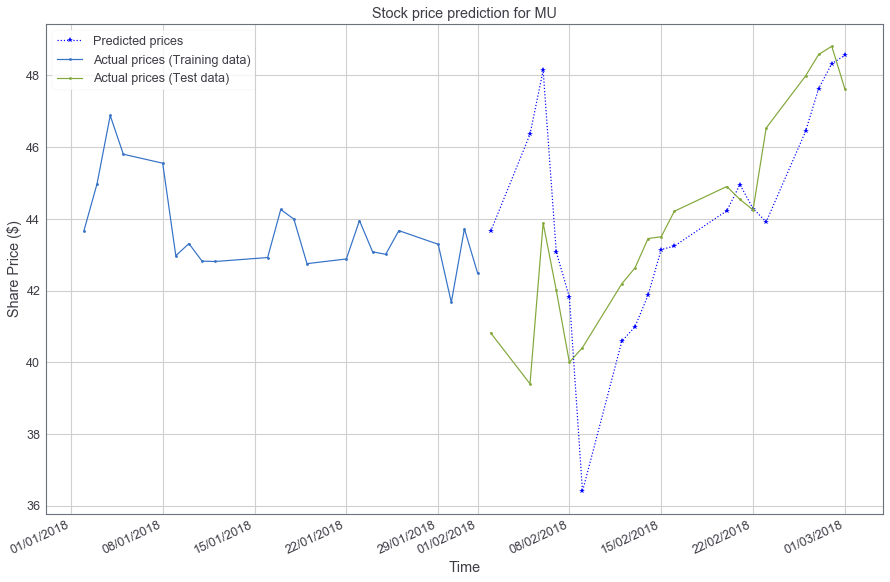

LSTM RMSE Score: 2.468 US dollar
LSTM trend Score: 36.8 %


Yesterday price:  [-0.41684665]
X:  [-0.41684665]
Inverse scale  Original Pred:  0.2362751    After Scaling:  0.2819768719375123
2018-02-02    42.771977
dtype: float64


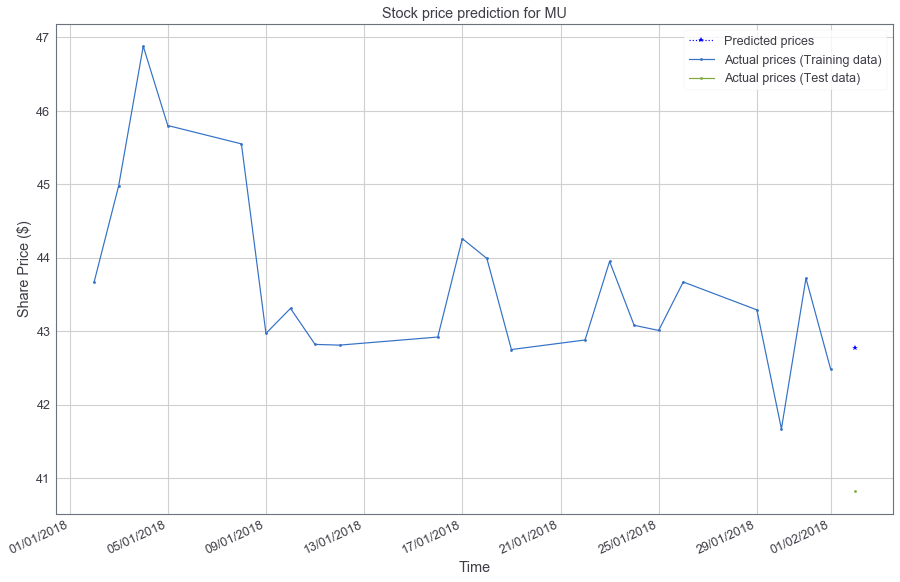

In [44]:
predictions = one_step_lstm.predict()
one_step_lstm.plot(predictions)

lstm_score = one_step_lstm.score(metric="rmse", predictions=predictions)
print("LSTM RMSE Score: %.3f US dollar" % lstm_score)
trend_score = one_step_lstm.score(metric="trend", predictions=predictions)
print("LSTM trend Score: %.1f %%" % (trend_score*100))

print("\n")
one_day_pred = one_step_lstm.forecast_lstm_one_step()
one_step_lstm.plot(one_day_pred)

In [54]:
start_train_date = "01/01/2015"
end_train_start_test_date = "10/01/2018"
end_test_date = "20/01/2019"

multi_step_lstm = MultiStepLSTMCompany("MU", start_train_date, end_train_start_test_date, end_test_date, 
                         n_lag=1, n_seq=3, n_epochs=3000, n_batch=1, n_neurons=4)

multi_step_lstm.train()

Fitting the model


'train data'

array([[[-0.06877579]],

       [[-0.04951857]],

       [[-0.01237964]],

       [[ 0.63136176]],

       [[ 0.15955983]],

       [[-0.31361761]],

       [[-0.02751032]],

       [[-0.01650619]],

       [[-0.00687758]],

       [[ 0.11416781]],

       [[ 0.38651994]],

       [[ 0.42503439]],

       [[ 0.30949106]],

       [[ 0.21595598]],

       [[ 0.21870702]],

       [[-0.17744154]],

       [[ 0.04676754]],

       [[ 0.36863824]],

       [[ 0.07702889]],

       [[-0.02888583]],

       [[ 0.33975241]],

       [[ 0.22283356]],

       [[ 0.32599725]],

       [[ 0.03988996]],

       [[ 0.04539202]],

       [[ 0.95323246]],

       [[ 0.18019257]],

       [[ 0.4525447 ]],

       [[ 0.17469051]],

       [[ 0.33149931]],

       [[ 0.15543329]],

       [[ 0.10041265]],

       [[ 0.25997249]],

       [[ 0.0261348 ]],

       [[ 0.0261348 ]],

       [[ 0.11966988]],

       [[ 0.23796424]],

       [[ 0.21320495]],

       [[ 0.3562586 ]],

       [[-0.2352132 ]],



'test data'

array([[-0.04951857, -0.01237964,  0.63136176],
       [-0.01237964,  0.63136176,  0.15955983],
       [ 0.63136176,  0.15955983, -0.31361761],
       ...,
       [ 0.7221458 , -0.09766162,  0.130674  ],
       [-0.09766162,  0.130674  , -0.51031637],
       [ 0.130674  , -0.51031637,  0.29298487]])

Finished fitting the model, time taken to train: 3591.1 s


X:  [0.29298487] y:  [0.06464924 0.19669876 0.22971114]
Prediction:  [0.21670564, 0.22214769, 0.2300182]
X:  [0.06464924] y:  [0.19669876 0.22971114 0.56808803]
Prediction:  [0.21672152, 0.22149155, 0.23041451]
X:  [0.19669876] y:  [0.22971114 0.56808803 0.12517194]
Prediction:  [0.21672152, 0.22149155, 0.23041451]
X:  [0.22971114] y:  [ 0.56808803  0.12517194 -0.14167813]
Prediction:  [0.21672152, 0.22149155, 0.23041451]
X:  [0.56808803] y:  [ 0.12517194 -0.14167813  0.2352132 ]
Prediction:  [0.23669398, 0.2869851, 0.17003588]
X:  [0.12517194] y:  [-0.14167813  0.2352132   0.49381018]
Prediction:  [0.26126167, 0.18182245, 0.21228878]
X:  [-0.14167813] y:  [ 0.2352132   0.49381018 -0.03988996]
Prediction:  [0.21672152, 0.22149155, 0.23041451]
X:  [0.2352132] y:  [ 0.49381018 -0.03988996  0.18019257]
Prediction:  [0.21672152, 0.22149155, 0.23041451]
X:  [0.49381018] y:  [-0.03988996  0.18019257  0.38101788]
Prediction:  [0.22850856, 0.25960436, 0.19511944]
X:  [-0.03988996] y:  [0.18019

Prediction:  [0.21672152, 0.22149155, 0.23041451]
X:  [0.06189821] y:  [0.50481431 0.03713893 0.16093535]
Prediction:  [0.21672152, 0.22149155, 0.23041451]
X:  [0.50481431] y:  [0.03713893 0.16093535 0.30123796]
Prediction:  [0.2297786, 0.2625634, 0.19203644]
X:  [0.03713893] y:  [0.16093535 0.30123796 0.2957359 ]
Prediction:  [0.21672152, 0.22149155, 0.23041451]
X:  [0.16093535] y:  [ 0.30123796  0.2957359  -0.11141678]
Prediction:  [0.21672152, 0.22149155, 0.23041451]
X:  [0.30123796] y:  [ 0.2957359  -0.11141678 -0.04539202]
Prediction:  [0.21669082, 0.22275926, 0.2296488]
X:  [0.2957359] y:  [-0.11141678 -0.04539202  0.1911967 ]
Prediction:  [0.21669027, 0.22278199, 0.22963507]
X:  [-0.11141678] y:  [-0.04539202  0.1911967   0.00137552]
Prediction:  [0.21672152, 0.22149155, 0.23041451]
X:  [-0.04539202] y:  [ 0.1911967   0.00137552 -0.66162311]
Prediction:  [0.21672152, 0.22149155, 0.23041451]
X:  [0.1911967] y:  [ 0.00137552 -0.66162311  0.09215956]
Prediction:  [0.21672152, 0.221

'predictions before inverse transform'

2018-01-11      [0.21670564, 0.22214769, 0.2300182]
2018-01-12     [0.21672152, 0.22149155, 0.23041451]
2018-01-16     [0.21672152, 0.22149155, 0.23041451]
2018-01-17     [0.21672152, 0.22149155, 0.23041451]
2018-01-18      [0.23669398, 0.2869851, 0.17003588]
2018-01-19     [0.26126167, 0.18182245, 0.21228878]
2018-01-22     [0.21672152, 0.22149155, 0.23041451]
2018-01-23     [0.21672152, 0.22149155, 0.23041451]
2018-01-24     [0.22850856, 0.25960436, 0.19511944]
2018-01-25     [0.21672152, 0.22149155, 0.23041451]
2018-01-26     [0.21672152, 0.22149155, 0.23041451]
2018-01-29       [0.216442, 0.23303322, 0.22344323]
2018-01-30     [0.21672152, 0.22149155, 0.23041451]
2018-01-31     [0.21672152, 0.22149155, 0.23041451]
2018-02-01     [0.25612214, 0.34318852, 0.11601153]
2018-02-02        [0.309054, 0.19654411, 0.1568977]
2018-02-05      [0.14217475, 0.1782114, 0.15648675]
2018-02-06     [0.21672152, 0.22149155, 0.23041451]
2018-02-07        [1.2472078, 0.4012301, 0.8067641]
2018-02-08  

Inverse scale  Original Pred:  [[0.21670564 0.22214769 0.2300182 ]]    After Scaling:  [0.06272498 0.08250684 0.11111615]
Inverse difference Pred:  [0.06272498 0.08250684 0.11111615]   + Reference Price: 43.31  =  [43.37272497773171, 43.45523182064295, 43.56634796917439]
Inverse scale  Original Pred:  [[0.21672152 0.22149155 0.23041451]]    After Scaling:  [0.06278272 0.08012176 0.11255674]
Inverse difference Pred:  [0.06278272 0.08012176 0.11255674]   + Reference Price: 42.82  =  [42.88278271973133, 42.96290448278189, 43.07546122342348]
Inverse scale  Original Pred:  [[0.21672152 0.22149155 0.23041451]]    After Scaling:  [0.06278272 0.08012176 0.11255674]
Inverse difference Pred:  [0.06278272 0.08012176 0.11255674]   + Reference Price: 42.81  =  [42.87278271973133, 42.95290448278189, 43.06546122342348]
Inverse scale  Original Pred:  [[0.21672152 0.22149155 0.23041451]]    After Scaling:  [0.06278272 0.08012176 0.11255674]
Inverse difference Pred:  [0.06278272 0.08012176 0.11255674]  

Inverse difference Pred:  [ 0.33273628 -0.07286482 -0.05216365]   + Reference Price: 60.14  =  [60.472736283540726, 60.39987146794796, 60.347707818597556]
Inverse scale  Original Pred:  [[0.21672152 0.22149155 0.23041451]]    After Scaling:  [0.06278272 0.08012176 0.11255674]
Inverse difference Pred:  [0.06278272 0.08012176 0.11255674]   + Reference Price: 61.15  =  [61.21278271973133, 61.292904482781886, 61.40546122342348]
Inverse scale  Original Pred:  [[0.21672152 0.22149155 0.23041451]]    After Scaling:  [0.06278272 0.08012176 0.11255674]
Inverse difference Pred:  [0.06278272 0.08012176 0.11255674]   + Reference Price: 61.07  =  [61.13278271973133, 61.21290448278189, 61.32546122342348]
Inverse scale  Original Pred:  [[0.21672152 0.22149155 0.23041451]]    After Scaling:  [0.06278272 0.08012176 0.11255674]
Inverse difference Pred:  [0.06278272 0.08012176 0.11255674]   + Reference Price: 58.92  =  [58.98278271973133, 59.06290448278189, 59.17546122342348]
Inverse scale  Original Pred

Inverse scale  Original Pred:  [[0.21672152 0.22149155 0.23041451]]    After Scaling:  [0.06278272 0.08012176 0.11255674]
Inverse difference Pred:  [0.06278272 0.08012176 0.11255674]   + Reference Price: 62.57  =  [62.63278271973133, 62.71290448278189, 62.82546122342348]
Inverse scale  Original Pred:  [[-0.21532623 -0.02934542 -0.19804561]]    After Scaling:  [-1.5077108 -0.8316706 -1.4448959]
Inverse difference Pred:  [-1.5077108 -0.8316706 -1.4448959]   + Reference Price: 57.59  =  [56.08228918552399, 55.250618603229526, 53.805722739696506]
Inverse scale  Original Pred:  [[0.21869192 0.14013165 0.27955663]]    After Scaling:  [ 0.06994511 -0.21562144  0.29118836]
Inverse difference Pred:  [ 0.06994511 -0.21562144  0.29118836]   + Reference Price: 58.74  =  [58.80994511187077, 58.59432367026806, 58.88551202952862]
Inverse scale  Original Pred:  [[0.21672152 0.22149155 0.23041451]]    After Scaling:  [0.06278272 0.08012176 0.11255674]
Inverse difference Pred:  [0.06278272 0.08012176 0.

Inverse scale  Original Pred:  [[0.21672152 0.22149155 0.23041451]]    After Scaling:  [0.06278272 0.08012176 0.11255674]
Inverse difference Pred:  [0.06278272 0.08012176 0.11255674]   + Reference Price: 52.26  =  [52.32278271973133, 52.402904482781885, 52.51546122342348]
Inverse scale  Original Pred:  [[0.21672152 0.22149155 0.23041451]]    After Scaling:  [0.06278272 0.08012176 0.11255674]
Inverse difference Pred:  [0.06278272 0.08012176 0.11255674]   + Reference Price: 51.37  =  [51.43278271973133, 51.512904482781884, 51.62546122342348]
Inverse scale  Original Pred:  [[0.21672152 0.22149155 0.23041451]]    After Scaling:  [0.06278272 0.08012176 0.11255674]
Inverse difference Pred:  [0.06278272 0.08012176 0.11255674]   + Reference Price: 51.34  =  [51.402782719731334, 51.48290448278189, 51.595461223423484]
Inverse scale  Original Pred:  [[0.21672152 0.22149155 0.23041451]]    After Scaling:  [0.06278272 0.08012176 0.11255674]
Inverse difference Pred:  [0.06278272 0.08012176 0.1125567

Inverse scale  Original Pred:  [[0.21672152 0.22149155 0.23041451]]    After Scaling:  [0.06278272 0.08012176 0.11255674]
Inverse difference Pred:  [0.06278272 0.08012176 0.11255674]   + Reference Price: 40.45  =  [40.512782719731334, 40.59290448278189, 40.705461223423484]
Inverse scale  Original Pred:  [[0.21672152 0.22149155 0.23041451]]    After Scaling:  [0.06278272 0.08012176 0.11255674]
Inverse difference Pred:  [0.06278272 0.08012176 0.11255674]   + Reference Price: 39.76  =  [39.82278271973133, 39.902904482781885, 40.01546122342348]
Inverse scale  Original Pred:  [[0.21672152 0.22149155 0.23041451]]    After Scaling:  [0.06278272 0.08012176 0.11255674]
Inverse difference Pred:  [0.06278272 0.08012176 0.11255674]   + Reference Price: 38.68  =  [38.74278271973133, 38.82290448278189, 38.93546122342348]
Inverse scale  Original Pred:  [[0.05191812 0.12581047 0.06697959]]    After Scaling:  [-0.53627765 -0.26767892 -0.4815292 ]
Inverse difference Pred:  [-0.53627765 -0.26767892 -0.48

Inverse scale  Original Pred:  [[0.21672152 0.22149155 0.23041451]]    After Scaling:  [0.06278272 0.08012176 0.11255674]
Inverse difference Pred:  [0.06278272 0.08012176 0.11255674]   + Reference Price: 31.0  =  [31.06278271973133, 31.142904482781887, 31.25546122342348]
Inverse scale  Original Pred:  [[0.2470606  0.31347698 0.14340353]]    After Scaling:  [ 0.17306527  0.41448882 -0.20372817]
Inverse difference Pred:  [ 0.17306527  0.41448882 -0.20372817]   + Reference Price: 32.7  =  [32.873065274953845, 33.2875540971756, 33.083825927972796]
Inverse scale  Original Pred:  [[0.35505143 0.09221865 0.17792988]]    After Scaling:  [ 0.56561196 -0.3897852  -0.0782249 ]
Inverse difference Pred:  [ 0.56561196 -0.3897852  -0.0782249 ]   + Reference Price: 34.0  =  [34.56561195850372, 34.175826758146286, 34.09760186076164]
Inverse scale  Original Pred:  [[0.06479983 0.1332893  0.07975434]]    After Scaling:  [-0.4894526  -0.24049336 -0.435093  ]
Inverse difference Pred:  [-0.4894526  -0.24049

2018-01-11    [43.37272497773171, 43.45523182064295, 43.5663...
2018-01-12    [42.88278271973133, 42.96290448278189, 43.0754...
2018-01-16    [42.87278271973133, 42.95290448278189, 43.0654...
2018-01-17    [42.98278271973133, 43.06290448278189, 43.1754...
2018-01-18    [44.39538262248039, 44.71357346534729, 44.6066...
2018-01-19    [44.214686175584795, 44.15061077266932, 44.197...
2018-01-22    [42.81278271973133, 42.89290448278189, 43.0054...
2018-01-23    [42.94278271973133, 43.02290448278189, 43.1354...
2018-01-24    [44.05562861710787, 44.27429049164057, 44.2585...
2018-01-25    [43.14278271973133, 43.222904482781885, 43.335...
2018-01-26    [43.07278271973133, 43.152904482781885, 43.265...
2018-01-29    [43.73176668033004, 43.85384245410562, 43.9410...
2018-01-30    [43.35278271973133, 43.432904482781886, 43.545...
2018-01-31    [41.73278271973133, 41.81290448278189, 41.9254...
2018-02-01    [43.92600399374962, 44.44849425673485, 44.1451...
2018-02-02    [42.88841124415398, 42.877

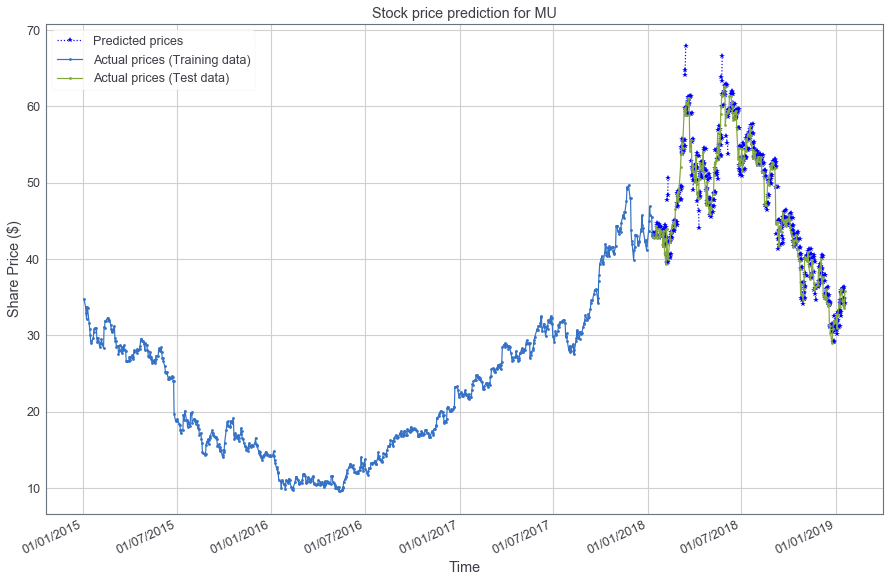

'actual'

array([[42.82, 42.81, 42.92],
       [42.81, 42.92, 44.26],
       [42.92, 44.26, 43.99],
       [44.26, 43.99, 42.75],
       [43.99, 42.75, 42.88],
       [42.75, 42.88, 43.95],
       [42.88, 43.95, 43.08],
       [43.95, 43.08, 43.01],
       [43.08, 43.01, 43.67],
       [43.01, 43.67, 43.29],
       [43.67, 43.29, 41.67],
       [43.29, 41.67, 43.72],
       [41.67, 43.72, 42.49],
       [43.72, 42.49, 40.82],
       [42.49, 40.82, 39.4 ],
       [40.82, 39.4 , 43.88],
       [39.4 , 43.88, 42.01],
       [43.88, 42.01, 40.  ],
       [42.01, 40.  , 40.41],
       [40.  , 40.41, 42.19],
       [40.41, 42.19, 42.63],
       [42.19, 42.63, 43.45],
       [42.63, 43.45, 43.5 ],
       [43.45, 43.5 , 44.21],
       [43.5 , 44.21, 44.9 ],
       [44.21, 44.9 , 44.54],
       [44.9 , 44.54, 44.25],
       [44.54, 44.25, 46.53],
       [44.25, 46.53, 47.98],
       [46.53, 47.98, 48.58],
       [47.98, 48.58, 48.81],
       [48.58, 48.81, 47.62],
       [48.81, 47.62, 49.11],
       [47

'predicted'

array([[43.37272498, 43.45523182, 43.56634797],
       [42.88278272, 42.96290448, 43.07546122],
       [42.87278272, 42.95290448, 43.06546122],
       [42.98278272, 43.06290448, 43.17546122],
       [44.39538262, 44.71357347, 44.6066539 ],
       [44.21468618, 44.15061077, 44.19728049],
       [42.81278272, 42.89290448, 43.00546122],
       [42.94278272, 43.02290448, 43.13546122],
       [44.05562862, 44.27429049, 44.25854966],
       [43.14278272, 43.22290448, 43.33546122],
       [43.07278272, 43.15290448, 43.26546122],
       [43.73176668, 43.85384245, 43.94105858],
       [43.35278272, 43.43290448, 43.54546122],
       [41.73278272, 41.81290448, 41.92546122],
       [43.92600399, 44.44849426, 44.14519617],
       [42.88841124, 42.87784909, 42.7231722 ],
       [40.61180522, 40.53460368, 40.37843301],
       [39.46278272, 39.54290448, 39.65546122],
       [47.68860019, 48.42207158, 50.6296593 ],
       [42.16588938, 42.28504643, 42.28319607],
       [40.06278272, 40.14290448, 40.255


Calculating trend score for  1
Price 1 day before 43.31
Actual price:  42.82  | Predicted price:  43.37272497773171
Actual trend:  down  | Predicted trend:  up
Price 1 day before 42.82
Actual price:  42.81  | Predicted price:  42.88278271973133
Actual trend:  down  | Predicted trend:  up
Price 1 day before 42.81
Actual price:  42.92  | Predicted price:  42.87278271973133
Actual trend:  up  | Predicted trend:  up
Price 1 day before 42.92
Actual price:  44.26  | Predicted price:  42.98278271973133
Actual trend:  up  | Predicted trend:  up
Price 1 day before 44.26
Actual price:  43.99  | Predicted price:  44.39538262248039
Actual trend:  down  | Predicted trend:  up
Price 1 day before 43.99
Actual price:  42.75  | Predicted price:  44.214686175584795
Actual trend:  down  | Predicted trend:  up
Price 1 day before 42.75
Actual price:  42.88  | Predicted price:  42.81278271973133
Actual trend:  up  | Predicted trend:  up
Price 1 day before 42.88
Actual price:  43.95  | Predicted price:  42.

Actual price:  52.29  | Predicted price:  52.85278271973133
Actual trend:  down  | Predicted trend:  up
Price 1 day before 52.29
Actual price:  53.4  | Predicted price:  52.35278271973133
Actual trend:  up  | Predicted trend:  up
Price 1 day before 53.4
Actual price:  52.81  | Predicted price:  53.51024522036314
Actual trend:  down  | Predicted trend:  up
Price 1 day before 52.81
Actual price:  52.67  | Predicted price:  52.87278271973133
Actual trend:  down  | Predicted trend:  up
Price 1 day before 52.67
Actual price:  53.04  | Predicted price:  52.73278271973133
Actual trend:  up  | Predicted trend:  up
Price 1 day before 53.04
Actual price:  53.39  | Predicted price:  53.10267113983631
Actual trend:  up  | Predicted trend:  up
Price 1 day before 53.39
Actual price:  52.26  | Predicted price:  53.45266913563013
Actual trend:  down  | Predicted trend:  up
Price 1 day before 52.26
Actual price:  51.37  | Predicted price:  52.32278271973133
Actual trend:  down  | Predicted trend:  up
P

Actual price:  29.02  | Predicted price:  30.38278271973133
Actual trend:  down  | Predicted trend:  up
Price 1 day before 29.02
Actual price:  30.89  | Predicted price:  29.08278271973133
Actual trend:  up  | Predicted trend:  up
Price 1 day before 30.89
Actual price:  31.93  | Predicted price:  31.07950890004635
Actual trend:  up  | Predicted trend:  up
Price 1 day before 31.93
Actual price:  31.57  | Predicted price:  32.53732215642929
Actual trend:  down  | Predicted trend:  up
Price 1 day before 31.57
Actual price:  31.73  | Predicted price:  31.002302236557007
Actual trend:  up  | Predicted trend:  down
Price 1 day before 31.73
Actual price:  32.75  | Predicted price:  31.79278271973133
Actual trend:  up  | Predicted trend:  up
Price 1 day before 32.75
Actual price:  31.0  | Predicted price:  32.849916845560074
Actual trend:  down  | Predicted trend:  up
Price 1 day before 31.0
Actual price:  32.7  | Predicted price:  31.06278271973133
Actual trend:  up  | Predicted trend:  up
Pr

Actual trend:  up  | Predicted trend:  up
Price 1 day before 53.0
Actual price:  54.01  | Predicted price:  50.96589774608612
Actual trend:  up  | Predicted trend:  down
Price 1 day before 54.01
Actual price:  56.5  | Predicted price:  53.090347811579704
Actual trend:  up  | Predicted trend:  down
Price 1 day before 56.5
Actual price:  54.7  | Predicted price:  54.21307106897235
Actual trend:  down  | Predicted trend:  down
Price 1 day before 54.7
Actual price:  53.39  | Predicted price:  57.4436469078064
Actual trend:  down  | Predicted trend:  up
Price 1 day before 53.39
Actual price:  55.48  | Predicted price:  54.956374906748536
Actual trend:  up  | Predicted trend:  up
Price 1 day before 55.48
Actual price:  59.03  | Predicted price:  53.53290448278189
Actual trend:  up  | Predicted trend:  down
Price 1 day before 59.03
Actual price:  59.97  | Predicted price:  56.22473956227302
Actual trend:  up  | Predicted trend:  down
Price 1 day before 59.97
Actual price:  61.49  | Predicted 

Actual price:  44.16  | Predicted price:  45.93542331293225
Actual trend:  down  | Predicted trend:  up
Price 1 day before 44.16
Actual price:  43.58  | Predicted price:  45.292904482781886
Actual trend:  down  | Predicted trend:  up
Price 1 day before 43.58
Actual price:  43.07  | Predicted price:  44.302904482781884
Actual trend:  down  | Predicted trend:  up
Price 1 day before 43.07
Actual price:  42.27  | Predicted price:  43.722904482781885
Actual trend:  down  | Predicted trend:  up
Price 1 day before 42.27
Actual price:  41.61  | Predicted price:  43.21290448278189
Actual trend:  down  | Predicted trend:  up
Price 1 day before 41.61
Actual price:  41.97  | Predicted price:  42.41290448278189
Actual trend:  up  | Predicted trend:  up
Price 1 day before 41.97
Actual price:  42.47  | Predicted price:  41.75290448278189
Actual trend:  up  | Predicted trend:  down
Price 1 day before 42.47
Actual price:  42.34  | Predicted price:  42.11664749801159
Actual trend:  down  | Predicted tre

Actual trend:  up  | Predicted trend:  up
Price 1 day before 46.53
Actual price:  47.98  | Predicted price:  44.79546122342348
Actual trend:  up  | Predicted trend:  down
Price 1 day before 47.98
Actual price:  48.58  | Predicted price:  44.50546122342348
Actual trend:  up  | Predicted trend:  down
Price 1 day before 48.58
Actual price:  48.81  | Predicted price:  46.98340879261494
Actual trend:  up  | Predicted trend:  down
Price 1 day before 48.81
Actual price:  47.62  | Predicted price:  48.14572931408882
Actual trend:  down  | Predicted trend:  down
Price 1 day before 47.62
Actual price:  49.11  | Predicted price:  48.66163043903187
Actual trend:  up  | Predicted trend:  up
Price 1 day before 49.11
Actual price:  52.03  | Predicted price:  49.06546122342348
Actual trend:  up  | Predicted trend:  down
Price 1 day before 52.03
Actual price:  53.74  | Predicted price:  47.87546122342348
Actual trend:  up  | Predicted trend:  down
Price 1 day before 53.74
Actual price:  53.97  | Predic

Actual trend:  up  | Predicted trend:  down
Price 1 day before 57.45
Actual price:  56.22  | Predicted price:  56.40546122342348
Actual trend:  down  | Predicted trend:  down
Price 1 day before 56.22
Actual price:  55.02  | Predicted price:  57.241901098787785
Actual trend:  down  | Predicted trend:  up
Price 1 day before 55.02
Actual price:  54.29  | Predicted price:  57.67195058874786
Actual trend:  down  | Predicted trend:  up
Price 1 day before 54.29
Actual price:  53.17  | Predicted price:  56.47546122342348
Actual trend:  down  | Predicted trend:  up
Price 1 day before 53.17
Actual price:  53.39  | Predicted price:  55.275461223423484
Actual trend:  up  | Predicted trend:  up
Price 1 day before 53.39
Actual price:  53.76  | Predicted price:  54.54546122342348
Actual trend:  up  | Predicted trend:  up
Price 1 day before 53.76
Actual price:  53.96  | Predicted price:  53.42546122342348
Actual trend:  up  | Predicted trend:  down
Price 1 day before 53.96
Actual price:  53.01  | Pred

Actual trend:  down  | Predicted trend:  up
Price 1 day before 34.8
Actual price:  35.21  | Predicted price:  37.95031809255481
Actual trend:  up  | Predicted trend:  up
Price 1 day before 35.21
Actual price:  36.03  | Predicted price:  35.56546122342348
Actual trend:  up  | Predicted trend:  up
Price 1 day before 36.03
Actual price:  35.02  | Predicted price:  35.05546122342348
Actual trend:  down  | Predicted trend:  down
Price 1 day before 35.02
Actual price:  34.2  | Predicted price:  35.468441641926766
Actual trend:  down  | Predicted trend:  up
Price 1 day before 34.2
Actual price:  33.88  | Predicted price:  36.310068784952165
Actual trend:  down  | Predicted trend:  up
Price 1 day before 33.88
Actual price:  34.11  | Predicted price:  35.275461223423484
Actual trend:  up  | Predicted trend:  up
Price 1 day before 34.11
Actual price:  31.41  | Predicted price:  34.455461223423484
Actual trend:  down  | Predicted trend:  up
Price 1 day before 31.41
Actual price:  31.28  | Predict

'actual'

array([[42.82, 42.81, 42.92],
       [42.81, 42.92, 44.26],
       [42.92, 44.26, 43.99],
       [44.26, 43.99, 42.75],
       [43.99, 42.75, 42.88],
       [42.75, 42.88, 43.95],
       [42.88, 43.95, 43.08],
       [43.95, 43.08, 43.01],
       [43.08, 43.01, 43.67],
       [43.01, 43.67, 43.29],
       [43.67, 43.29, 41.67],
       [43.29, 41.67, 43.72],
       [41.67, 43.72, 42.49],
       [43.72, 42.49, 40.82],
       [42.49, 40.82, 39.4 ],
       [40.82, 39.4 , 43.88],
       [39.4 , 43.88, 42.01],
       [43.88, 42.01, 40.  ],
       [42.01, 40.  , 40.41],
       [40.  , 40.41, 42.19],
       [40.41, 42.19, 42.63],
       [42.19, 42.63, 43.45],
       [42.63, 43.45, 43.5 ],
       [43.45, 43.5 , 44.21],
       [43.5 , 44.21, 44.9 ],
       [44.21, 44.9 , 44.54],
       [44.9 , 44.54, 44.25],
       [44.54, 44.25, 46.53],
       [44.25, 46.53, 47.98],
       [46.53, 47.98, 48.58],
       [47.98, 48.58, 48.81],
       [48.58, 48.81, 47.62],
       [48.81, 47.62, 49.11],
       [47

'predicted'

array([[43.37272498, 43.45523182, 43.56634797],
       [42.88278272, 42.96290448, 43.07546122],
       [42.87278272, 42.95290448, 43.06546122],
       [42.98278272, 43.06290448, 43.17546122],
       [44.39538262, 44.71357347, 44.6066539 ],
       [44.21468618, 44.15061077, 44.19728049],
       [42.81278272, 42.89290448, 43.00546122],
       [42.94278272, 43.02290448, 43.13546122],
       [44.05562862, 44.27429049, 44.25854966],
       [43.14278272, 43.22290448, 43.33546122],
       [43.07278272, 43.15290448, 43.26546122],
       [43.73176668, 43.85384245, 43.94105858],
       [43.35278272, 43.43290448, 43.54546122],
       [41.73278272, 41.81290448, 41.92546122],
       [43.92600399, 44.44849426, 44.14519617],
       [42.88841124, 42.87784909, 42.7231722 ],
       [40.61180522, 40.53460368, 40.37843301],
       [39.46278272, 39.54290448, 39.65546122],
       [47.68860019, 48.42207158, 50.6296593 ],
       [42.16588938, 42.28504643, 42.28319607],
       [40.06278272, 40.14290448, 40.255

t+1 RMSE: 1.576512
t+2 RMSE: 2.174449
t+3 RMSE: 2.740044
LSTM RMSE Score: US dollar [1.5765121201924341, 2.1744491801913766, 2.7400436887705277]


In [56]:
predictions = multi_step_lstm.predict()
multi_step_lstm.plot(predictions)
#display("next days predictions", multi_step_lstm.forecast_lstm_one_step())
trend_score = multi_step_lstm.score(metric="trend", predictions=predictions)
print("LSTM trend Score: ", trend_score)
lstm_score = multi_step_lstm.score(metric="rmse", predictions=predictions)
print("LSTM RMSE Score: US dollar", lstm_score)

In [32]:
display("train", multi_step_lstm.train_raw_series)
display("test", multi_step_lstm.test_raw_series)

'train'

date
2015-01-02    34.750
2015-01-05    33.775
2015-01-06    32.870
2015-01-07    32.100
2015-01-08    33.670
2015-01-09    33.525
Name: 5. adjusted close, dtype: float64

'test'

date
2015-01-12    31.660
2015-01-13    30.835
2015-01-14    30.050
2015-01-15    29.300
2015-01-16    28.990
2015-01-20    29.670
Name: 5. adjusted close, dtype: float64